Please fill in your name and that of your teammate.

You: Bhargav Solanki

Teammate: Carmen Sangro Prieto

# Introduction

Welcome to the seventh lab. After learning about SVMs last week, we finally introduce the _kernel trick_ and make them capable of tackling nonlinear data. We also introduced more generally the concept of _function mapping_ and learned a bit about word embeddings.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 16 points (out of 24 available) to pass** (66%).

# 1. Function Mappings

#### 1.1 **[3pt]** Give an _original_ example for each of the following concepts (i.e. not one that you find in the slides!):

1. Mapping from an example data type to a decision space
2. Inverse mapping
3. Mapping from the example data to two destination feature spaces
4. Mapping from the two feature spaces above to a decision space

For example (here is what we presented in the slides):

1. Given a picture, decide if it represents an apple or an orange. Original space: 
$64\times64\times3$ images; destination space: $\{$apple, orange$\}$.
2. Given the label apple, map it to a $64\times64\times3$ picture of the fruit.
3. Map $\Phi_1 $ goes from the picture to an estimate of average color; map $\Phi_2$ goes from the picture to a fruit width measured in pixels.
4. Map $\Phi_3$ goes from the two features of estimated color and fruit width, to the decision space of classifying the fruit as apple or orange.

## 1. Mapping from an example data type to a decision space
Given an input json we need to find if they fall in income group,decision space {"High", "Low"} 
```json
[
    {
    "id" : 1234,
    "fname" : "Michael",
    "lname" : "Scott",
    "title" : "Regional Manager"
    "Income": "45000"
    },
    {
    "id" : 1235,
    "fname" : "Dwight",
    "lname" : "Schrute",
    "title" : "Assistant to the Regional Manager",
    "Income": "35000"
    }    
]
```

##### 2. Inverse mapping
Given a Income group of "High, "medium" or "low" identify the salary of the person

##### 3. Mapping from the example data to two destination feature spaces
Map  $\Phi_1$ gives the title of the person and map $\Phi_2$ gives the income range

##### 4. Mapping from the two feature spaces above to a decision space

Map $\Phi_3\$  goes from two features above of title and salary range and gives the name of the employee

#### 1.2 **[1pt]** Explain advantages and disadvantages of Bag Of Words versus Word Embedding.

##### <u>Bag Of words</u>

It is a special case of n- gram model, where n is 1. Here we simply keep a dictionary of a word and the number of occurances of that word in a sentance/paragraph/book etc. The order does not matter and nor does the position of the word in the text.  
**Advantage** : Its easier and less complex to build. You can perform easy unions and can be used in computervision. Human readable.  
**Disadvantage** : Order is not tracked. Grammar is ignored. Relationship between words is not maintained. High dimensionality.
Cant calculate similarities between words. 

##### <u>Word Embedding<u>

It means, word mapping. here we represent words as vectors in vectorial space. Reduce the dimensionality.  
**Advantage** :  
Order of words can be tracked. Grammar rules can be retained. Similarities between words can be found using simple cosine rules.  
**Disadvantage** :  
Difficult for humans to understand, but easier for computers. Unable to handle unknown words. Scaling to new language is harder.


#### 1.3 **[2pt]** Refer to the graph exemplifying Word Embedding in the slides, and its explanation. (i) What does it mean that the point representing Paris is close to the point representing Berlin? (ii) Why is the point for Paris closer to the point for France than to the point representing Italy?

(i) While embedding texts, city names are closer to each other and county names are closer to each other.  Hence, Paris and Berlin are close. That is the distance between these two words is less.  
(ii) Also, in embedded texts, City and Country are often mentioned together, so when one speaks of Paris, they also mention france more often. Hence word distance between these two is closer than Paris and berlin.

# 2. Kernels theory

#### 2.1 **[1pt]** Write the definition of kernel function (use latex).

$ \\
k(x,y) = \langle \phi(x), \phi(y) \rangle \\
\forall x,y \in X \\
k(x,y) = \langle \phi(x), \phi(y) \rangle  = \langle k(\cdot,x), k(\cdot,y) \rangle
$

#### 2.2 **[1pt]** Explain the Representer property in English.

You represent a each data point as a kernal function (mapping) in hilbert space. That data point with real values represented by kernal function is now a **representation** in hilbert space. This is the representer property

#### 2.3 **[2pt]** Explain the kernel trick in English.

Its easier to work with n dimensional data in n+1th dimension for doing math operations. Once we do that, we can get our classifiers or regressors much easier. However, using kernal trick, we get the same results without actually computing the points in n+1th dimension.

#### 2.4 **[1pt]** Explain in English the required properties of a Mercer kernel.

**Properties**:  
<u>Symmetry</u> :  
A kernal function of $x_1$ and  $x_2$ is the same as kernal function of $x_2$ and  $x_1$  for all $x_1$ and $x_2$ in $X$.  
<u>Positive definiteness:</u>  
The result value of a kernal function cannot be negative and the thus the vector matrix generated will have only non negative values

#### 2.5 **[1pt]** Calculate by hand the linear kernel on points $\{[2,4], [1, -2]\}$.

Let linear kernal be represented as $z$
$ \\
z = \left[
        2,4\right] . \begin{bmatrix}
           1 \\
           -2
         \end{bmatrix}          
$  
z =  (2 x 1) + (4 x -2)  
z = 2 - 8   
z = -6  

#### 2.6 **[1pt]** How do you compute the entry of the Gram matrix for row $i$ and column $j$ for a Gaussian kernel?

$ \\
K(x_i, x_j) = e^{- \gamma . {|| x_i - x_j ||}^2} \\
for \\
\gamma > 0
$  
or 
$ \\ 
 = e^{-({x_i - x_j})^T . C . {(x_i - x_j)}}
$  
for a symmetric, positive definite matrix C

#### 2.7 **[2pt]** Explain why does the Perceptron work with non-linearly separable data using Kernelization. Do you think Linear Regression would work with Kernelization? Explain your reasoning.

When we kernalize, we hope to see the non linearly sperated date in n dimension,s to be (hyperplane)linearly seperable in n +1 th dimension. For that reason, Perceptron with kernalization works for non-linearly separable data.
Also, it is possible to use Linear regression with kernalization, for example using kernal ridge regression.  It is for the same reasons above, If we want to find the value given oter set of values, kernalization can help predict that value. 
By representing our data in higher dimension

#### 2.8 **[1pt]** Explain the Universal Consistency of SVMs (in English).

as the number of the samples increase, the predicted value converges to the true value. SVMs are consistent

# 3. Kernels in practice

For simplicity, let's use once again a two-species adaptation of the Iris dataset. You can copy the code from the last assignment. This time though, to make it harder for linear classifiers let's separate the "central" species from the other two. This means that you should set label `versicolor` rather than `setosa` as class `-1`. I suggest you un-comment the `pairplot`s to verify it works.  
NOTE: all recommendation on how to handle and prepare the data from the past assignment(s) still hold. As do the warnings that using the wrong data sets will **invalidate the whole answer**.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object


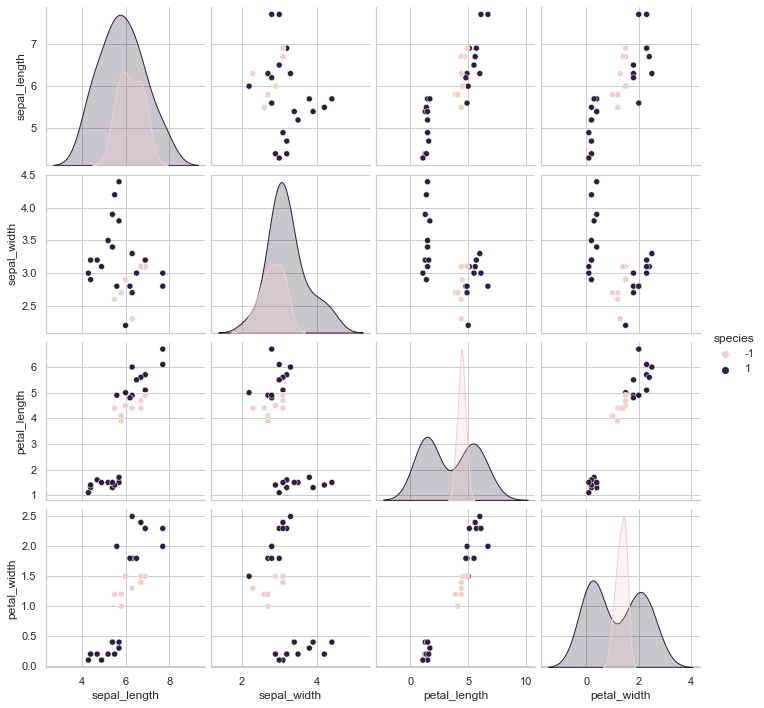

In [4]:
from sklearn.model_selection import train_test_split
df = sns.load_dataset('iris')
# sns.pairplot(df, hue='species')

df.loc[df['species'] == 'versicolor', 'species'] = -1
df.loc[df['species'] != -1, 'species'] = 1
df['species'] = pd.to_numeric(df['species'])
print(df.dtypes)
# sns.pairplot(df, hue='species')

train, test = train_test_split(df, test_size=0.2)
sns.pairplot(test, hue='species')

#### 3.1 **[1pt]** Train an SVM with linear kernel on the Iris data using Scikit-learn (this time you are required to use class `SVC`). Then do the same using a Gaussian kernel (still `SVC`) and compare the performance using its method `score()`.

- Remember to prepare inputs/labels for Scikit-learn; again the last assignment should help.
- Calling the method `score()` on the trained model just does the prediction and returns the percentage of correct answers. It is a useful function to learn to quickly check if your model is working.
- You expect the linear kernel to perform poorly. If the performance is close to the Gaussian kernel, it is possible that the test set was by chance not homogeneous. You can verify that by doing a pairplot on the test set, and if so just run the data loading and preparation again.
- No need to find an optimal value for `C` but pass it explicitly.

In [41]:
from sklearn.svm import SVC
def helper_get_x_and_label(data):
    x = data[data.columns[:-1]].values.tolist()
    label = data[data.columns[-1]].values.tolist()
    return x, label
lin_clf = SVC(C=1.0, kernel = 'linear')
gaus_clf = SVC(C=1.0, kernel='rbf') 
x_train, labels = helper_get_x_and_label(train)
x_test, labels_test = helper_get_x_and_label(test)
#x_train = train[train.columns[:-1]].values.tolist()
#labels = train[train.columns[-1]].values.tolist()
#x_train
lin_clf.fit(x_train, labels)
gaus_clf.fit(x_train, labels)   
print("Score for linear on Trained data-->",round(lin_clf.score(x_train, labels)*100,2))
print("Score for Gaussian on Trained data-->",round(gaus_clf.score(x_train, labels)*100,2))
# Now testing performance on test
print("Score for linear on Test data-->",round(lin_clf.score(x_test, labels_test)*100,2))
print("Score for Gaussian on Test data-->",round(gaus_clf.score(x_test, labels_test)*100,2))


Score for linear on Trained data--> 73.33
Score for Gaussian on Trained data--> 94.17
Score for linear on Test data--> 83.33
Score for Gaussian on Test data--> 100.0


#### 3.2 **[1pt]** Write a Python function that takes two data points and a value for `gamma` as input, and returns the Gaussian kernel of the points.

In [42]:
def get_gauss_kernal(point1, point2, gamma):
    x1 = np.array(point1[:-1]) # removing labels 
    x2 = np.array(point2[:-1])
    return np.exp(-1 * gamma*(
        np.absolute(
            np.linalg.norm(x1-x2)
        )**2
    )
                 )
get_gauss_kernal([1,-2], [2,-4], 1.0)

0.36787944117144233

#### 3.3 **[3pt]** Write a Python function that takes two dataset (and a gamma) and returns their Gram matrix for a Gaussian kernel.

- You need two datasets because you need to compute the *train* matrix between the train and itself, but the *test* matrix between the test and the train.
- Simplest method:
    - Create a return matrix, initially empty, shaped size_of_A times size_of_B, with dtype 'float64'
    - Run two loops with indices (i, j) in ranges up to size_of_A and size_of_B
    - Compute the kernel between row i in A and row j in B, and place it in the return matrix at row i column j
- Careful with Pandas' `iterrows()`, as the "index" it returns is the DataFrame index (i.e. for use with `loc[]`), not the ordinal index (i.e. for `iloc[`). 
- Generating the matrix automatically is harder, as there is no straightforward way to compute an `outer` in numpy or pandas with a custom function.
- One way is to use `column_stack` https://stackoverflow.com/a/21759340 then apply the kernel defined above.
- Another is to use `ufunc.outer` http://folk.uio.no/inf3330/scripting/doc/python/NumPy/Numeric/numpy-7.html which is only defined for Universal Functions (`ufuncs`). Look at the examples for `outer`, you can re-implement the function above starting with `np.subtract.outer(A, B)`, which generates the matrix (but check the shape!), then you can run the other operations using broadcast. Both outers and universal functions are super useful, it's worth the effort of learning them, more [[here]](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).
- `pandas.apply()` along rows is also an option you should be able to consider with by now. The function name for `-` is `np.subtract` (which is an `ufunc`, see above).

Above all, remember the first rule of a good BDD engineer: red, green, refactor! First make it work, then make it better ;) complex solutions are as good as bonus questions here.

Also, know that a common default value for gamma is one over the number of features.

In [43]:
def get_gram_matrix(df1, df2, gamma = None):
    if not gamma:
        gamma = df1.shape[1]
    #print(df1.shape[0])
    #print(df1.iloc[0])
    n1 = df1.shape[0]
    n2 = df2.shape[0]
    res = []
    for i in range(0, n1):
        temp = []
        for j in range(0, n2):
            temp.append(get_gauss_kernal(df1.iloc[i], df2.iloc[j], gamma))
        res.append(temp)
    return np.array(res)
res = get_gram_matrix(train, train, .25)
print(res.shape)
print(res)

(120, 120)
[[1.         0.09926125 0.97044553 ... 0.17033299 0.83945702 0.08629359]
 [0.09926125 1.         0.12745397 ... 0.83527021 0.10487354 0.86935824]
 [0.97044553 0.12745397 1.         ... 0.22313016 0.8824969  0.11765484]
 ...
 [0.17033299 0.83527021 0.22313016 ... 1.         0.23107799 0.69767633]
 [0.83945702 0.10487354 0.8824969  ... 0.23107799 1.         0.08332555]
 [0.08629359 0.86935824 0.11765484 ... 0.69767633 0.08332555 1.        ]]


#### 3.4 **[2pt]** Compute the Gram matrix on the inputs of your datasets. Then train a new SVM, same settings as before with linear kernel, but this time using the Gram matrix('s rows) as the inputs. Print the `score` performance of this new SVM.

- With an 80-20 split you are looking at a $120 \times 120$ shape for the train, and $30 \times 120$ for the test

In [44]:
train_matrix_df = pd.DataFrame(data=get_gram_matrix(train, train, 0.25))
test_matrix_df = pd.DataFrame(data=get_gram_matrix(test, train, 0.25))
print(test_matrix_df.shape)
gram_lin_clf = SVC(C=1.0, kernel = 'linear')
gram_lin_clf.fit(train_matrix_df, labels)
print("Score for Gaussian matrix and then linear on Test data-->",round(gram_lin_clf.score(test_matrix_df, labels_test)*100,2))
print("Score for Gaussian matrix and then linear on Train data-->",round(gram_lin_clf.score(train_matrix_df, labels)*100,2))


(30, 120)
Score for Gaussian matrix and then linear on Test data--> 100.0
Score for Gaussian matrix and then linear on Train data--> 97.5


#### 3.5 **[1pt]** Plot the confusion matrix for the three SVMs you trained in the past questions.

- Let's learn a convenient and easy function for this common, very useful metric: `ConfusionMatrixDisplay.from_estimator` [[link here]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator).
- So far we saw explicitly 4 cells: true and false positives, true and false negatives. More generally the confusion matrix can be scaled to any number of classes by having the correct labels on the rows, and the predictions on the columns. Errors will be outside the diagonal.
- You can use the `normalize` option to get percentages if you like. Which setting do you find most informative?
- It's easier if you write a `for` loop over the three models you trained in the previous questions -- just make sure you gave them different names. Also careful as one takes a Gram matrix as input ;)

Confusion matrix for linear 
Confusion matrix for Gaussian 
Confusion matrix for gram matrix and then linear 


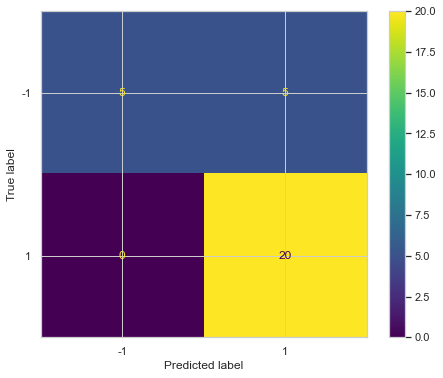

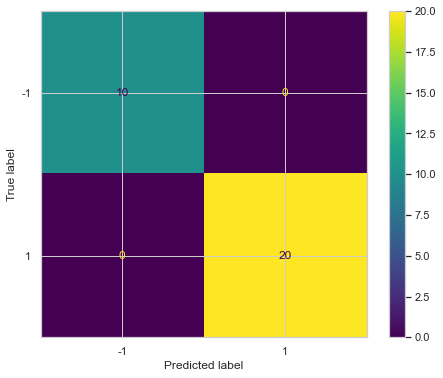

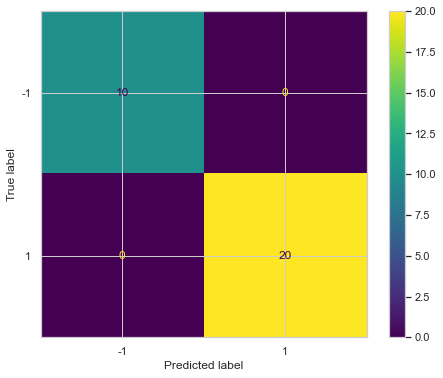

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion matrix for linear ")
ConfusionMatrixDisplay.from_estimator(lin_clf, x_test, labels_test)
print("Confusion matrix for Gaussian ")
ConfusionMatrixDisplay.from_estimator(gaus_clf, x_test, labels_test)
print("Confusion matrix for gram matrix and then linear ")
ConfusionMatrixDisplay.from_estimator(gram_lin_clf, test_matrix_df, labels_test)


# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Use a contour plot to show the classification boundaries of your SVMs. [[link here]](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

#### BONUS **[ZERO pt]** Learn to search for the best values for `gamma` and `C` [[link here]](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) . NOTE: this is extremely valuable experience for when (not even if!) you will need a SVM for a real application.

#### BONUS **[ZERO pt]** Generate points to run through with a regression algorithm like Linear Regression from our earlier exercises. This time start from a nonlinear equation (e.g. $x^2$), and add noise as usual. Then try your hand with SVR with a (linear or) nonlinear kernel, which is equivalent to running Linear Regression on the Gram matrix (yet another name: Kernel Ridge Regression) [[link here]](https://scikit-learn.org/stable/modules/kernel_ridge.html).

### Final considerations

- I once read a quote that restricting calculus to linear functions is like restricting biology to the study of great apes (help tracking its origin would be welcome). We start from linearity because it's easier to study; the real world is rarely so kind, so learning adaptations such as the kernel trick is simply invaluable.
- Trying (scikit-learn) Naïve Bayes or Linear Discriminant Analysis on the Gram matrices would take you just a minute and be invaluable experience. For example, I wouldn't be surprised if LDA performed better than NB (think: why?). But if we had a very large dataset, the Gram matrix would become too large for LDA to handle (remember it does not scale well on the number of features).
- **[IMPORTANT]** If you want to gain first-hand experience in tools you can actually use in the real world, consider submitting on the bonus questions from this point on, as I am switching the topic from "topics for curiosity" to "actual deployed value".